In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import json

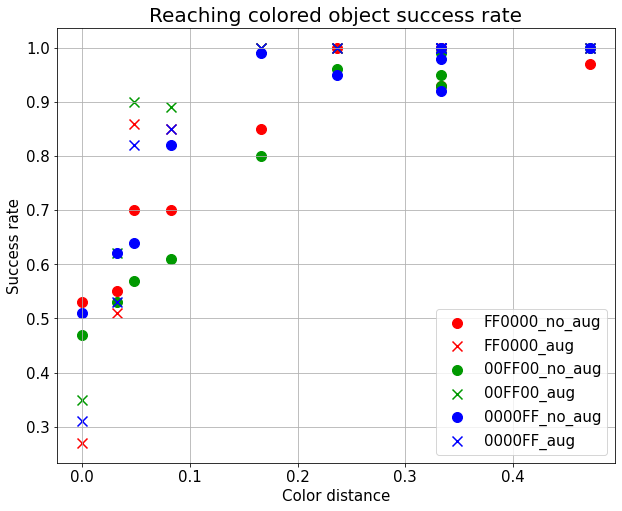

In [2]:
%matplotlib inline
plt.figure(0, figsize=(10, 8))

for color in ["FF0000", "00FF00", "0000FF"]:
    for aug_type in ("no_aug", "aug"):
        with open(f"test_nn32_{color}_{aug_type}_model.json", "r") as f:
            x = json.load(f)
        tgt_color = np.array(x["target_color"])
        dit_colors = np.array(x["distractor_colors"])
        dist_color = np.linalg.norm(dit_colors - tgt_color, axis=1) / (3*255)
        acc = np.array(x['acc_list'])
        if aug_type == "no_aug":
            marker = "o"
        else:
            marker = "x"
        c = tgt_color/255
        if color == "00FF00":
            c *= 0.6
        plt.scatter(dist_color, acc, marker=marker, s=100, color=c, label=f"{color}_{aug_type}")

plt.title("Reaching colored object success rate", fontsize=20)
plt.xlabel("Color distance", fontsize=15)
plt.ylabel("Success rate", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid()
#plt.savefig("../data/reach_color_rgb_sucess_rate")

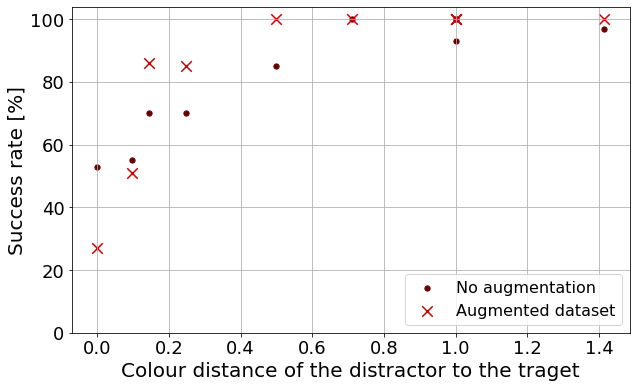

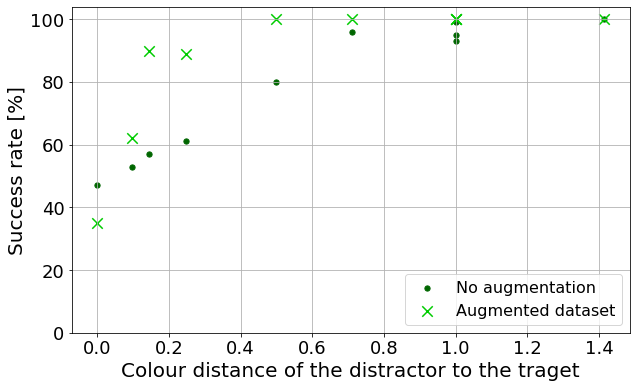

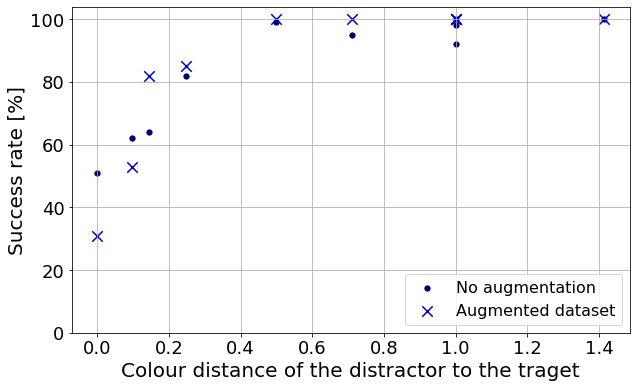

In [3]:
%matplotlib inline

for i, color in enumerate(["FF0000", "00FF00", "0000FF"]):
    plt.figure(i, figsize=(10, 6))
    for aug_type in ("no_aug", "aug"):
        with open(f"test_nn32_{color}_{aug_type}_model.json", "r") as f:
            x = json.load(f)
        tgt_color = np.array(x["target_color"])
        dit_colors = np.array(x["distractor_colors"])
        dist_color = np.linalg.norm(dit_colors - tgt_color, axis=1) / 255
        acc = np.array(x['acc_list']) * 100
        if aug_type == "no_aug":
            marker = "."
            label = "No augmentation"
            c = tgt_color/255 * 0.4
        else:
            marker = "x"
            label = "Augmented dataset"
            c = tgt_color/255 *0.8
        idx_order = np.argsort(dist_color)
        plt.scatter(dist_color[idx_order], acc[idx_order], marker=marker, s=110,  color=c, label=label)

    plt.ylim(0, 104)
    plt.xlabel("Colour distance of the distractor to the traget", fontsize=20)
    plt.ylabel("Success rate [%]", fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=16, loc='lower right')
    plt.grid()
    #plt.savefig(f"figure_chabge_distractor_color_{color}")

[[  0   0   0]
 [255 255 255]
 [255 255   0]
 [255   0 255]
 [128   0   0]
 [192   0   0]
 [230   0   0]
 [255   0   0]
 [255 128 128]
 [255  26  26]]
[0.     0.098  0.1442 0.2471 0.498  0.7099 1.     1.     1.     1.4142]
[[  0   0   0]
 [255 255 255]
 [255 255   0]
 [  0 255 255]
 [  0 128   0]
 [  0 192   0]
 [  0 230   0]
 [  0 255   0]
 [128 255 128]
 [ 26 255  26]]
[0.     0.098  0.1442 0.2471 0.498  0.7099 1.     1.     1.     1.4142]
[[  0   0   0]
 [255 255 255]
 [255   0 255]
 [  0 255 255]
 [  0   0 128]
 [  0   0 192]
 [  0   0 230]
 [  0   0 255]
 [128 128 255]
 [ 26  26 255]]
[0.     0.098  0.1442 0.2471 0.498  0.7099 1.     1.     1.     1.4142]


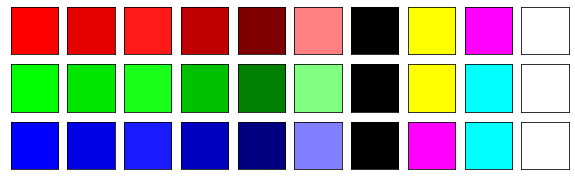

In [5]:
plt.figure(0, figsize=(10, 3))
for i, color in enumerate(["FF0000", "00FF00", "0000FF"]):
    for aug_type in ("no_aug",):
        with open(f"test_nn32_{color}_{aug_type}_model.json", "r") as f:
            x = json.load(f)
        d_colors = np.array(x["distractor_colors"])
        tgt_color = np.array(x["target_color"])
        dist_color = np.linalg.norm(d_colors - tgt_color, axis=1) / 255
        
        print(d_colors)
        idx_order = np.argsort(dist_color)
        print(np.round(dist_color[idx_order], 4))
        
        for j, col in enumerate(d_colors[idx_order]):
            plt.subplot(3, len(d_colors), i*len(d_colors) + j + 1)
            img_line = np.array([col for _ in range(10)], dtype=np.uint8)
            img = np.array([img_line for _ in range(10)], dtype=np.uint8)
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
#plt.savefig('show_distractor_colors')

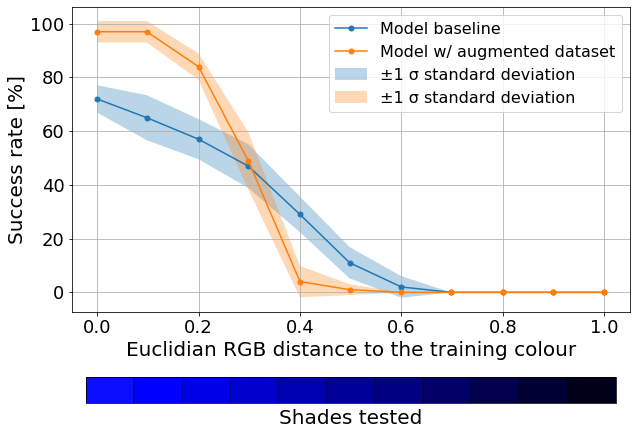

In [9]:
%matplotlib inline

naug = np.load("data/test_many_distractors_shades_of_target_nn32_0000FF_no_aug_model.npz")
aug = np.load("data/test_many_distractors_shades_of_target_nn32_0000FF_aug_model.npz")

plt.figure(figsize=(10, 8))
title_fontsize = 18
ax_fontsize = 20
lg_fontsize = 16
tk_fontsize = 18
cb_fontsize = 20
cb_y = -1.0
mks = 10


########################################

shades = np.arange(11)
N = len(naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)[shades] * 100
std_aug = np.array([aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)[shades] * 100
m_naug = naug["sucess_results"].mean(1)[shades] * 100
m_aug = aug["sucess_results"].mean(1)[shades] * 100

#x = np.arange(-1, 1.01, 0.1)
x = np.linalg.norm(naug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / 255
x = x[shades]
plt.plot(x, m_naug, '.-', markersize=mks, label="Model baseline")
plt.fill_between(x, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x, m_aug, '.-', markersize=mks, label="Model w/ augmented dataset")
plt.fill_between(x, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

#plt.title("(a) Shades of the target colour (adding black)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(range(12))
cmap_list = naug["target_colors"][11 - shades] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal',
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[])

clb.ax.set_title('Shades tested',fontsize=cb_fontsize, y=cb_y)

#plt.savefig('target/shades_blue.pdf')
plt.show()

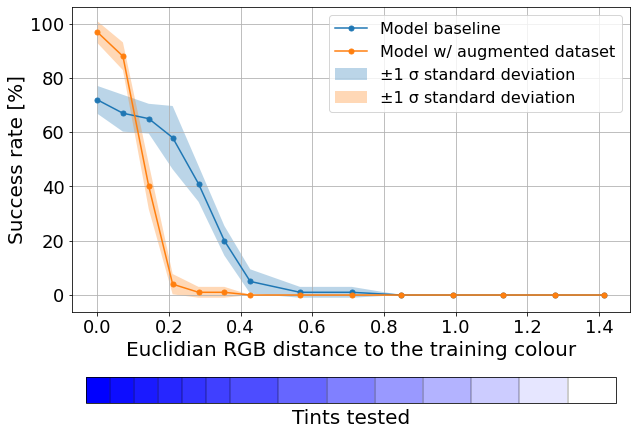

In [7]:
%matplotlib inline

naug = np.load("data/test_many_distractors_shades_of_target_nn32_0000FF_no_aug_model.npz")
aug = np.load("data/test_many_distractors_shades_of_target_nn32_0000FF_aug_model.npz")

plt.figure(figsize=(10, 8))
title_fontsize = 18
ax_fontsize = 20
lg_fontsize = 16
tk_fontsize = 18
cb_fontsize = 20
cb_y = -1.0
mks = 10


########################################

shades = np.arange(10, 24)
N = len(naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)[shades] * 100
std_aug = np.array([aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)[shades] * 100
m_naug = naug["sucess_results"].mean(1)[shades] * 100
m_aug = aug["sucess_results"].mean(1)[shades] * 100

#x = np.arange(-1, 1.01, 0.1)
x = np.linalg.norm(naug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / 255
x = x[shades]

plt.plot(x, m_naug, '.-', markersize=mks, label="Model baseline")
plt.fill_between(x, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x, m_aug, '.-', markersize=mks, label="Model w/ augmented dataset")
plt.fill_between(x, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

#plt.title("(b) Tints of the target colour (adding white)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(range(0, 30, 5)) + list(range(30, 120, 10))
cmap_list = naug["target_colors"][shades] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal', 
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[])

clb.ax.set_title('Tints tested',fontsize=cb_fontsize, y=cb_y)

#plt.savefig('target/tints_blue.pdf')
plt.show()

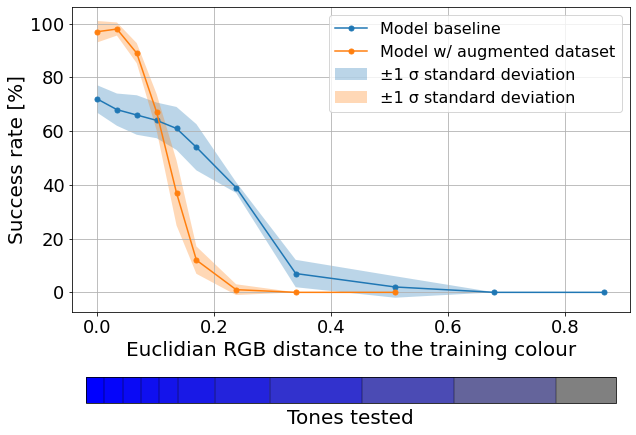

In [8]:
%matplotlib inline

tones_naug = np.load("data/test_many_distractors_tones_target_nn32_0000FF_no_aug_model.npz")
tones_aug = np.load("data/test_many_distractors_tones_target_nn32_0000FF_aug_model.npz")

plt.figure(figsize=(10, 8))
title_fontsize = 18
ax_fontsize = 20
lg_fontsize = 16
tk_fontsize = 18
cb_fontsize = 20
cb_y = -1.0
mks = 10


########################################


N = len(tones_naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([tones_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
std_aug = np.array([tones_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
m_naug = tones_naug["sucess_results"].mean(1) * 100
m_aug = tones_aug["sucess_results"].mean(1) * 100


#x = np.arange(-1, 1.01, 0.1)
x_naug = np.linalg.norm(tones_naug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / 255
x_aug = np.linalg.norm(tones_aug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / 255

plt.plot(x_naug, m_naug, '.-', markersize=mks, label="Model baseline")
plt.fill_between(x_naug, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x_aug, m_aug, '.-', markersize=mks, label="Model w/ augmented dataset")
plt.fill_between(x_aug, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

#plt.title("(c) Tones of the target colour (adding grey)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(x_naug) + [x_naug[-1] + 28/255]
cmap_list = tones_naug["target_colors"] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal', 
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[])

clb.ax.set_title('Tones tested',fontsize=cb_fontsize, y=cb_y)

#plt.savefig('target/tones_blue.pdf')
plt.show()

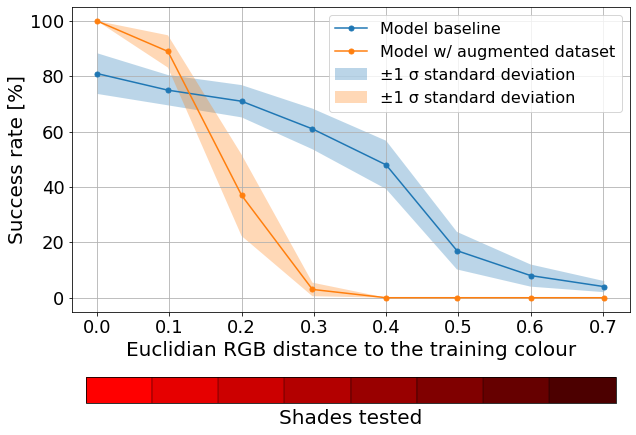

In [14]:
%matplotlib inline

shades_naug = np.load("data/test_many_distractors_tones_target_nn32_FF0000_no_aug_model.npz")
shades_aug = np.load("data/test_many_distractors_tones_target_nn32_FF0000_aug_model.npz")

plt.figure(figsize=(10, 8))
title_fontsize = 18
ax_fontsize = 20
lg_fontsize = 16
tk_fontsize = 18
cb_fontsize = 20
cb_y = -1.0
mks = 10


init_color = [255, 0, 0]
N = len(shades_naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([shades_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
std_aug = np.array([shades_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
m_naug = shades_naug["sucess_results"].mean(1) * 100
m_aug = shades_aug["sucess_results"].mean(1) * 100


#x = np.arange(-1, 1.01, 0.1)
x_naug = np.linalg.norm(shades_naug["target_colors"] - np.array(init_color), axis=1, ord=deg) / np.sqrt(255**2)
x_aug = np.linalg.norm(shades_aug["target_colors"] - np.array(init_color), axis=1, ord=deg) / np.sqrt(255**2)

plt.plot(x_naug, m_naug, '.-', markersize=mks, label="Model baseline")
plt.fill_between(x_naug, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x_aug, m_aug, '.-', markersize=mks, label="Model w/ augmented dataset")
plt.fill_between(x_aug, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

#plt.title("Shades of the red target (adding black)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(range(9))
cmap_list = shades_naug["target_colors"] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal',
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[])

clb.ax.set_title('Shades tested',fontsize=cb_fontsize, y=cb_y)

#plt.savefig('target/shades_red.pdf')
plt.show()

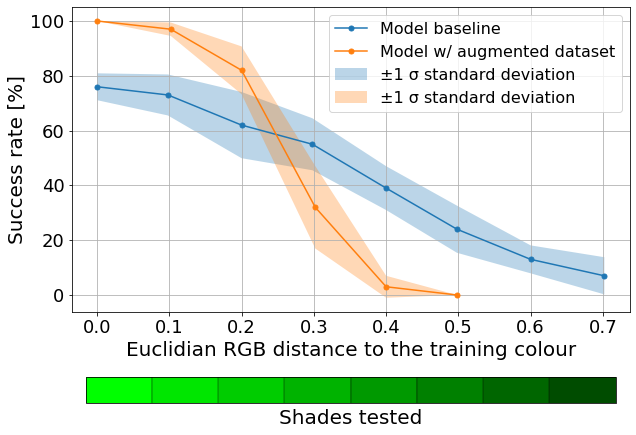

In [18]:
%matplotlib inline

shades_naug = np.load("data/test_many_distractors_shades_target_nn32_00FF00_no_aug_model.npz")
shades_aug = np.load("data/test_many_distractors_tones_target_nn32_00FF00_aug_model.npz")

plt.figure(figsize=(10, 8))
title_fontsize = 18
ax_fontsize = 20
lg_fontsize = 16
tk_fontsize = 18
cb_fontsize = 20
cb_y = -1.0
mks = 10


init_color = [0, 255, 0]
N = len(shades_naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([shades_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
std_aug = np.array([shades_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
m_naug = shades_naug["sucess_results"].mean(1) * 100
m_aug = shades_aug["sucess_results"].mean(1) * 100


#x = np.arange(-1, 1.01, 0.1)
x_naug = np.linalg.norm(shades_naug["target_colors"] - np.array(init_color), axis=1, ord=deg) / np.sqrt(255**2)
x_aug = np.linalg.norm(shades_aug["target_colors"] - np.array(init_color), axis=1, ord=deg) / np.sqrt(255**2)

plt.plot(x_naug, m_naug, '.-', markersize=mks, label="Model baseline")
plt.fill_between(x_naug, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x_aug, m_aug, '.-', markersize=mks, label="Model w/ augmented dataset")
plt.fill_between(x_aug, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

#plt.title("Shades of the green target (adding black)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(range(9))
cmap_list = shades_naug["target_colors"] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal',
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[], anchor=[5, 10])

clb.ax.set_title('Shades tested',fontsize=cb_fontsize, y=cb_y)

#plt.savefig('target/shades_green.pdf')
plt.show()

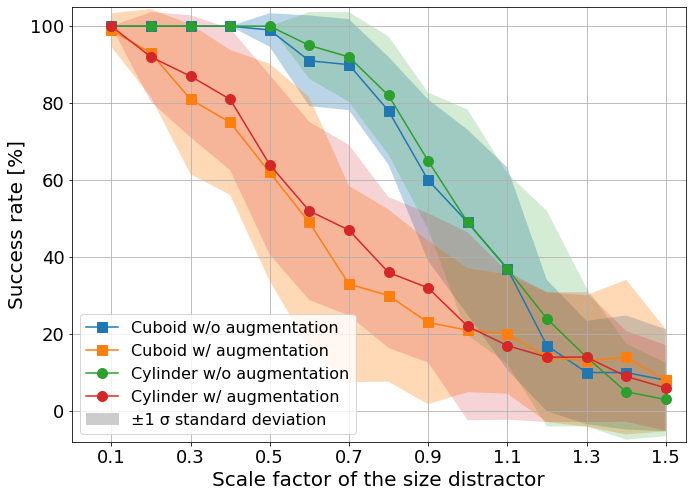

In [64]:
%matplotlib inline


fig = plt.figure(figsize=(11, 8))
title_fontsize = 18
ax_fontsize = 20
lg_fontsize = 16
tk_fontsize = 18
cb_fontsize = 20
cb_y = -1.0
mks = 10


scales_cub_naug = np.load('data/test_scales_new_cuboid_distractor_nn32_0000FF_no_aug_model.npz')
scales_cub_aug = np.load('data/test_scales_new_cuboid_distractor_nn32_0000FF_aug_model.npz')

scales_cyl_naug = np.load('data/test_scales_new_cylinder_distractor_nn32_0000FF_no_aug_model.npz')
scales_cyl_aug = np.load('data/test_scales_new_cylinder_distractor_nn32_0000FF_aug_model.npz')

N = 100
k = 20

factor_percent = 100

x_cub_naug = scales_cub_naug["distractor_scales"]
x_cub_aug = scales_cub_aug["distractor_scales"]
x_cyl_naug = scales_cyl_naug["distractor_scales"]
x_cyl_aug = scales_cyl_aug["distractor_scales"]

m_cub_naug = scales_cub_naug["sucess_results"].mean(1) * factor_percent
m_cub_aug = scales_cub_aug["sucess_results"].mean(1) * factor_percent
m_cyl_naug = scales_cyl_naug["sucess_results"].mean(1) * factor_percent
m_cyl_aug = scales_cyl_aug["sucess_results"].mean(1) * factor_percent

std_cub_naug = np.array([scales_cub_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent
std_cub_aug = np.array([scales_cub_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent
std_cyl_naug = np.array([scales_cyl_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent
std_cyl_aug = np.array([scales_cyl_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent

plt.plot(x_cub_naug, m_cub_naug, 's-', markersize=mks, label="Cuboid w/o augmentation")
plt.fill_between(x_cub_naug, m_cub_naug-std_cub_naug, m_cub_naug+std_cub_naug, alpha=0.3)
plt.plot(x_cub_aug, m_cub_aug, 's-', markersize=mks, label="Cuboid w/ augmentation")
plt.fill_between(x_cub_aug, m_cub_aug-std_cub_aug, m_cub_aug+std_cub_aug, alpha=0.3)
plt.plot(x_cyl_naug, m_cyl_naug, 'o-', markersize=mks, label="Cylinder w/o augmentation")
plt.fill_between(x_cyl_naug, m_cyl_naug-std_cyl_naug, m_cyl_naug+std_cyl_naug, alpha=0.2)
plt.plot(x_cyl_aug, m_cyl_aug, 'o-', markersize=mks, label="Cylinder w/ augmentation")
plt.fill_between(x_cyl_aug, m_cyl_aug-std_cyl_aug, m_cyl_aug+std_cyl_aug, alpha=0.2)
plt.fill_between([-100, -120], [0, 0], [1, 1], color=3*[.8], label="±1 σ standard deviation")

#plt.title("Effect of the distractor size and shape (cylinder vs. cuboid)", fontsize=title_fontsize)
plt.xlabel("Scale factor of the size distractor", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xlim(0, 1.55)
plt.ylim(-8, 105)

plt.xticks(list(np.arange(0.1, 1.6, 0.2)), fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
#plt.legend(fontsize=lg_fontsize, loc="lower left")
plt.grid()

#plt.savefig('target/scales.pdf')

In [9]:
ba = np.load("data/test_distractors_different_colors_nn32_0000FF_aug_model.npz")
bn = np.load("data/test_distractors_different_colors_nn32_0000FF_no_aug_model.npz")
ga = np.load("data/test_distractors_different_colors_nn32_00FF00_aug_model.npz")
gn = np.load("data/test_distractors_different_colors_nn32_00FF00_no_aug_model.npz")
ra = np.load("data/test_distractors_different_colors_nn32_FF0000_aug_model.npz")
rn = np.load("data/test_distractors_different_colors_nn32_FF0000_no_aug_model.npz")

sba = np.load("data/test_distractors_similar_colors_nn32_0000FF_aug_model.npz")
sbn = np.load("data/test_distractors_similar_colors_nn32_0000FF_no_aug_model.npz")

In [14]:
data = [ba, bn, ga, gn, ra, rn, sba, sbn]
for d in data:
    print(d['sucess_results'].mean(1))
    print(d['n_steps'].mean(1), d['n_steps'].std(1) )

[1.]
[96.96] [8.06091806]
[1.]
[96.15] [5.468775]
[1.]
[95.43] [5.20049036]
[1.]
[94.92] [5.94588934]
[1.]
[95.2] [5.07148893]
[0.98]
[99.38] [30.77979207]
[0.99]
[100.16] [20.83301226]
[0.59]
[187.08] [94.4770533]


In [25]:
x = np.ones(100)
x[0] = 0
np.std(np.array([20, 20, 19, 19, 20])*5)

2.449489742783178